In [158]:
"""
Refer to "ForestFireDataAnalysis.ipynb" for data visualization to understand model
"""

# Data handling
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
"""
Citation:
# P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data.
# In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence,
# Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December,
Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9.
"""
df = pd.read_csv("forestfires.csv")

In [147]:
# Cleaning data for model by translating to booleans
feats = ['month','day']
data = pd.get_dummies(df,columns=feats,drop_first=True)

In [152]:
# Splitting data for training
from sklearn.model_selection import train_test_split

# Remove area field (this is the expected evaluative output)
X = data.drop(['area'],axis=1).values
y = data['area'].values

# 80% of data for training, 20% for testing
# X_train = training input values
# y_train = training output values
# X_test = testing input values
# Y_test = testing output values
training_inputs, testing_inputs, training_outputs, testing_outputs = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
# Scaling data to fit model
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
training_inputs = sc.fit_transform(training_inputs)
testing_inputs = sc.transform(testing_inputs)

In [221]:
# Machine learning with keras using TensorFlow
import keras
from keras.models import Sequential
from keras.layers import Dense

# Hidden layers are calculated as: (input_node_count + output_node_count) / 2 = 7

model = Sequential([
    keras.layers.Input(shape=(training_inputs.shape[1])), 
    keras.layers.Dense(9, kernel_initializer='uniform', activation='relu', input_dim=29),  
    keras.layers.Dense(1, kernel_initializer = "uniform", activation = "sigmoid")  
])

In [222]:
# Gradient descent
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

# Fitting model to data
model.fit(training_inputs, training_outputs, batch_size = 10, epochs = 1, validation_data=(testing_inputs, testing_outputs))

loss, mae = model.evaluate(testing_inputs, testing_outputs)
print(f"Mean Absolute Error on Test Data: {mae}")

predictions = model.predict(testing_inputs)



4/4 [==============================] - 0s 732us/step - loss: 0.3967 - accuracy: 0.0000e+00
Mean Absolute Error on Test Data: 0.0
4/4 [==============================] - 0s 494us/step


In [223]:
correct_predictions = 0
total_predictions = 0
for i in range(0, len(predictions)):
    output = predictions[i]
    expected_output = testing_outputs[i]

    # Account for low amount of test data with generous margin of error
    if expected_output > output - 7 and expected_output < output + 7:
        correct_predictions += 1

    total_predictions += 1

    # print(f"Output: {predictions[i]}, Expected Output: {testing_outputs[i]}")

accuracy = (correct_predictions / total_predictions) * 100
print(f"Accuracy was {round(accuracy, 2)}%")

Accuracy was 80.77%


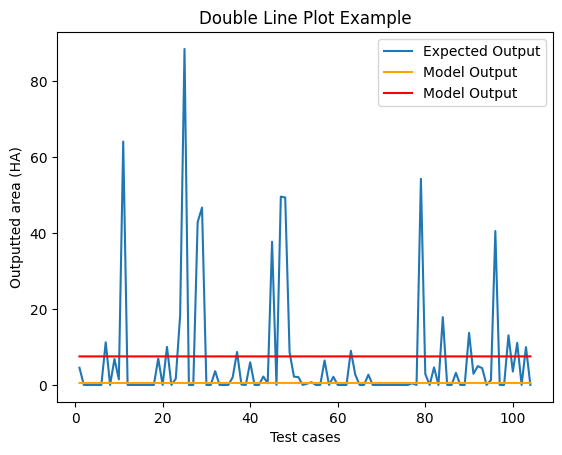

In [224]:
formatted_predictions = []
for i in range(0, len(predictions)):
    formatted_predictions.append(predictions[i][0])

x_values = [i for i in range(1, len(testing_inputs)+1)]
y1_values = testing_outputs
y2_values = formatted_predictions
error_margin = [formatted_predictions[i] + 7 for i in range(0, len(testing_inputs))]

# Creating line plots
sns.lineplot(x=x_values, y=y1_values, label='Expected Output')
sns.lineplot(x=x_values, y=y2_values, label='Model Output', color='orange')
sns.lineplot(x=x_values, y=error_margin, label='Model Output', color='red')

plt.xlabel('Test cases')
plt.ylabel('Outputted area (HA)')
plt.title('Double Line Plot Example')

plt.legend()

# Show plot
plt.show()